In [1]:
#James Godkin

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import *
from wordcloud import WordCloud
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
lyric_df = pd.read_csv("lyric.csv")
lyric_df

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [4]:
lyric_df.info()
lyric_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290183 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    290183 non-null  object
 1   Song      290182 non-null  object
 2   Genre     290183 non-null  object
 3   Language  290179 non-null  object
 4   Lyrics    290148 non-null  object
dtypes: object(5)
memory usage: 11.1+ MB


Artist       0
Song         1
Genre        0
Language     4
Lyrics      35
dtype: int64

In [5]:
lyric_df = lyric_df.dropna()
lyric_df.info()
lyric_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290143 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    290143 non-null  object
 1   Song      290143 non-null  object
 2   Genre     290143 non-null  object
 3   Language  290143 non-null  object
 4   Lyrics    290143 non-null  object
dtypes: object(5)
memory usage: 13.3+ MB


Artist      0
Song        0
Genre       0
Language    0
Lyrics      0
dtype: int64

In [6]:
lyric_df = lyric_df[lyric_df.Language == 'en']
lyric_df

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [7]:
print(lyric_df.Genre.unique())
lyric_df.groupby('Genre').count()

['Rock' 'Metal' 'Pop' 'Indie' 'Folk' 'Electronic' 'R&B' 'Jazz' 'Hip-Hop'
 'Country']


,Artist,Song,Language,Lyrics
Genre,,,,
Country,1890,1890,1890,1890
Electronic,2005,2005,2005,2005
Folk,8169,8169,8169,8169
Hip-Hop,2238,2238,2238,2238
Indie,7240,7240,7240,7240
Jazz,13314,13314,13314,13314
Metal,19133,19133,19133,19133
Pop,86298,86298,86298,86298
R&B,2765,2765,2765,2765


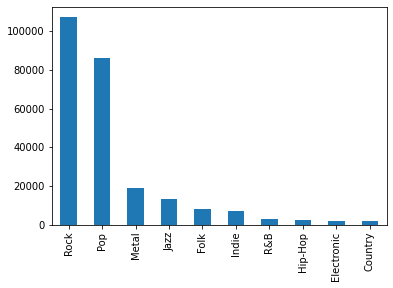

In [8]:
lyric_df.Genre.value_counts().plot(kind='bar')
plt.show()

In [9]:
lyric_clean_df = lyric_df[['Artist', 'Song', 'Lyrics', 'Genre']]
lyric_clean_df['Genre'] = np.where((lyric_clean_df.Genre == 'Metal'),'Rock',lyric_clean_df.Genre)
lyric_clean_df['Genre'] = np.where((lyric_clean_df.Genre == 'Folk'),'Country',lyric_clean_df.Genre)
lyric_clean_df['Genre'] = np.where((lyric_clean_df.Genre == 'Electronic'),'Pop',lyric_clean_df.Genre)
lyric_clean_df = lyric_clean_df[lyric_clean_df.Genre.isin(['Rock', 'Pop', 'Hip-Hop', 'R&B', 'Country'])]
lyric_clean_df = lyric_clean_df.replace(r'\\n',' ', regex=True)
lyric_clean_df = lyric_clean_df.replace('\n',' ', regex=True)
lyric_clean_df['Lyrics'] = lyric_clean_df['Lyrics'].str.replace('[^\w\s]','').str.lower()
lyric_clean_df['Artist'] = lyric_clean_df['Artist'].str.replace('[^\w\s]','').str.lower()
lyric_clean_df['Song'] = lyric_clean_df['Song'].str.replace('[^\w\s]','').str.lower()
lyric_clean_df = lyric_clean_df[lyric_clean_df['Lyrics'].str.len() > 500]
lyric_clean_df = lyric_clean_df.drop_duplicates(subset = ['Artist', 'Song'], keep = 'last').reset_index(drop = True)
lyric_clean_df

,Artist,Song,Lyrics,Genre
0,12 stones,3 leaf loser,biting the hand that feeds you lying to the vo...,Rock
1,12 stones,adrenaline,my heart is beating faster cant control these ...,Rock
2,12 stones,anthem for the underdog,you say you know just who i am but you cant im...,Rock
3,12 stones,anthem for the underdog picture perfect sessions,you say you know just who i am but you cant im...,Rock
4,12 stones,arms of a stranger,i came home early to see you couldnt wait to h...,Rock
...,...,...,...,...
173795,david guetta,when love takes over,its complicated it always is thats just the wa...,Pop
173796,bobby womack,i wish he didn t trust me so much,im the best friend hes got id give him the shi...,R&B
173797,bad boys blue,i totally miss you,bad boys blue i totally miss you i did you wro...,Pop
173798,celine dion,sorry for love,forgive me for the things that i never said to...,Pop


In [ ]:
print(lyric_df.Genre.unique())
lyric_df.groupby('Genre').count()

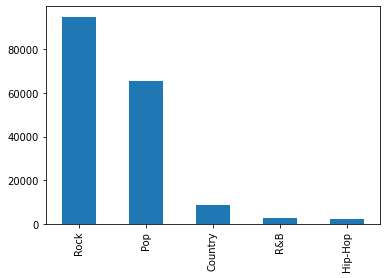

In [10]:
lyric_clean_df.Genre.value_counts().plot(kind='bar')
plt.show()

In [11]:
lemmatizer = WordNetLemmatizer()
sWords = set(nltk.corpus.stopwords.words('english')) 

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text) if not w in sWords])

lyric_clean_df['Lyrics'] = lyric_clean_df.Lyrics.apply(lemmatize_text)
lyric_clean_df['Lyrics']

0         biting hand feed lying voice inside reach beg ...
1         heart beating faster cant control feeling anym...
2         say know cant imagine wait across line thought...
3         say know cant imagine wait across line thought...
4         came home early see couldnt wait hold ive away...
                                ...                        
173795    complicated always thats way go feel like ive ...
173796    im best friend he got id give shirt back know ...
173797    bad boy blue totally miss wrong foolish heart ...
173798    forgive thing never said forgive knowing right...
173799    fourth july come custom go make way 108 place ...
Name: Lyrics, Length: 173800, dtype: object

In [12]:
lyric_clean_df

,Artist,Song,Lyrics,Genre
0,12 stones,3 leaf loser,biting hand feed lying voice inside reach beg ...,Rock
1,12 stones,adrenaline,heart beating faster cant control feeling anym...,Rock
2,12 stones,anthem for the underdog,say know cant imagine wait across line thought...,Rock
3,12 stones,anthem for the underdog picture perfect sessions,say know cant imagine wait across line thought...,Rock
4,12 stones,arms of a stranger,came home early see couldnt wait hold ive away...,Rock
...,...,...,...,...
173795,david guetta,when love takes over,complicated always thats way go feel like ive ...,Pop
173796,bobby womack,i wish he didn t trust me so much,im best friend he got id give shirt back know ...,R&B
173797,bad boys blue,i totally miss you,bad boy blue totally miss wrong foolish heart ...,Pop
173798,celine dion,sorry for love,forgive thing never said forgive knowing right...,Pop


In [13]:
lyric_just_lyrics_Genre_df = lyric_clean_df[['Lyrics','Genre']]
lyric_just_lyrics_Genre_df['word_count'] = lyric_just_lyrics_Genre_df['Lyrics'].str.count(" ") + 1
lyric_just_lyrics_Genre_df

,Lyrics,Genre,word_count
0,biting hand feed lying voice inside reach beg ...,Rock,73
1,heart beating faster cant control feeling anym...,Rock,174
2,say know cant imagine wait across line thought...,Rock,65
3,say know cant imagine wait across line thought...,Rock,65
4,came home early see couldnt wait hold ive away...,Rock,108
...,...,...,...
173795,complicated always thats way go feel like ive ...,Pop,123
173796,im best friend he got id give shirt back know ...,R&B,147
173797,bad boy blue totally miss wrong foolish heart ...,Pop,137
173798,forgive thing never said forgive knowing right...,Pop,135


         word_count
Genre              
Country  110.059018
Hip-Hop  290.353476
Pop      175.424401
R&B      141.161215
Rock     115.031509


<AxesSubplot:xlabel='Genre'>

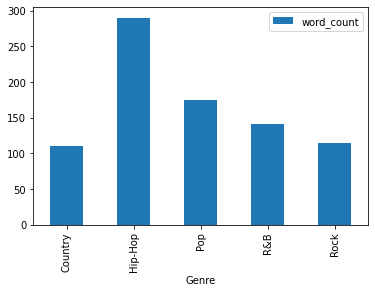

In [14]:
avg_words = lyric_just_lyrics_Genre_df.groupby('Genre').mean()
print(avg_words)
avg_words.plot.bar()

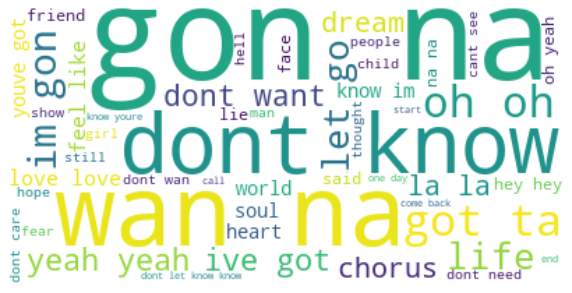

In [15]:
rock_gl_df = lyric_just_lyrics_Genre_df[lyric_just_lyrics_Genre_df['Genre']=='Rock']
rockLyrics = rock_gl_df['Lyrics'].tolist()
rockLyrics = ', '.join(rockLyrics)
wordcloud = WordCloud(background_color="white", max_words=50).generate(rockLyrics)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

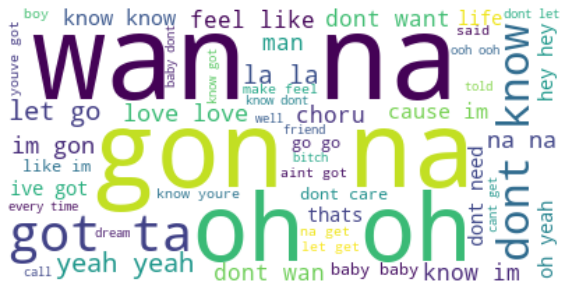

In [16]:
pop_gl_df = lyric_just_lyrics_Genre_df[lyric_just_lyrics_Genre_df['Genre']=='Pop']
popLyrics = pop_gl_df['Lyrics'].tolist()
popLyrics = ', '.join(popLyrics)
wordcloud = WordCloud(background_color="white", max_words=50).generate(popLyrics)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

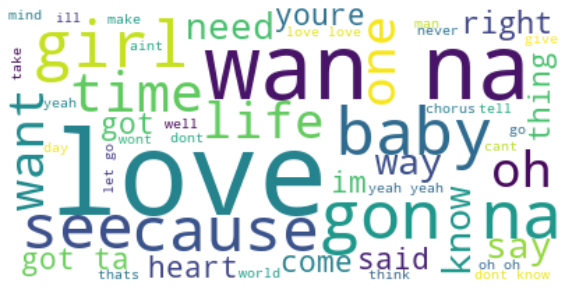

In [17]:
rb_gl_df = lyric_just_lyrics_Genre_df[lyric_just_lyrics_Genre_df['Genre']=='R&B']
rbLyrics = rb_gl_df['Lyrics'].tolist()
rbLyrics = ', '.join(rbLyrics)
wordcloud = WordCloud(background_color="white", max_words=50).generate(rbLyrics)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

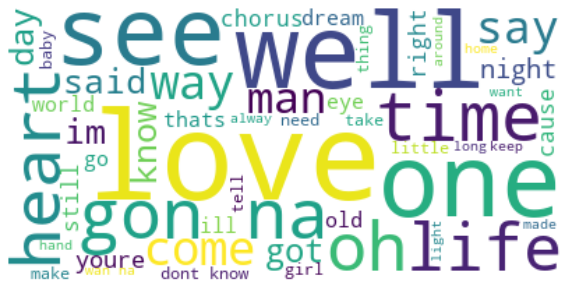

In [18]:
country_gl_df = lyric_just_lyrics_Genre_df[lyric_just_lyrics_Genre_df['Genre']=='Country']
countryLyrics = country_gl_df['Lyrics'].tolist()
countryLyrics = ', '.join(countryLyrics)
wordcloud = WordCloud(background_color="white", max_words=50).generate(countryLyrics)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

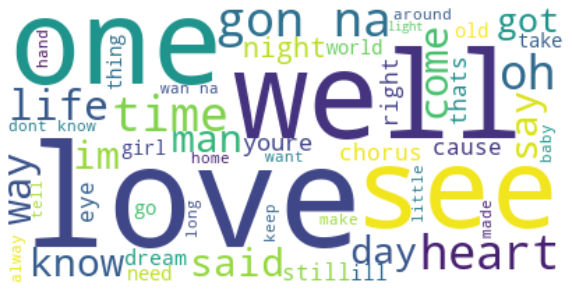

In [19]:
hiphop_gl_df = lyric_just_lyrics_Genre_df[lyric_just_lyrics_Genre_df['Genre']=='Hip-Hop']
hiphopLyrics = hiphop_gl_df['Lyrics'].tolist()
hiphopLyrics = ', '.join(hiphopLyrics)
wordcloud = WordCloud(background_color="white", max_words=50).generate(countryLyrics)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
lyric_train, lyric_test = train_test_split(lyric_clean_df, test_size=0.3,random_state=52637)
print('Train:')
print(lyric_train.head(5))
print('Test:')
print(lyric_test.head(5))

Train:
                    Artist              Song  \
132834       black sabbath             loner   
67179               prince  sign o the times   
75731          whitechapel        i dementia   
110650  bone thugsnharmony              fire   
81665          anne murray            wanted   

                                                   Lyrics Genre  
132834  he loner never say hello friend one he got pla...  Rock  
67179   oh yeah france skinny man died big disease lit...   Pop  
75731   dementia mind creator decision violent vision ...  Rock  
110650  chorus fire burn baby burn burn baby burn burn...   Pop  
81665   wanted someone kissed held closely stole heart...  Rock  
Test:
                  Artist                                         Song  \
96031  dark tranquillity                                miserys crown   
81194                 u2                               a celebration    
8045        eric clapton                                its christmas   
11270     

In [21]:
lyric_mnb = Pipeline([('vector', TfidfVectorizer(ngram_range=(1,2), max_df=0.4)),('classifier', MultinomialNB(alpha=0.1))])
lyric_mnb.fit(lyric_train.Lyrics, lyric_train.Genre)
mnb_predicted = lyric_mnb.predict(lyric_test.Lyrics)
np.mean(mnb_predicted == lyric_test.Genre)

0.6861334867663982

In [22]:
accuracy = accuracy_score(lyric_test.Genre, mnb_predicted)
recall = recall_score(lyric_test.Genre, mnb_predicted, average='weighted')
precision = precision_score(lyric_test.Genre, mnb_predicted, average='weighted', zero_division=1)
print('accuracy = ' + str(accuracy))
print('recall = ' + str(recall))
print('precision = ' + str(precision))

accuracy = 0.6861334867663982
recall = 0.6861334867663982
precision = 0.7079113564148588


In [23]:
full_lyric_df = lyric_train.append(lyric_test)
predicts = lyric_mnb.predict_proba(full_lyric_df.Lyrics)
full_lyric_df['Rock'], full_lyric_df['Pop'], full_lyric_df['Hip-Hop'], full_lyric_df['R&B'], full_lyric_df['Country'] = ['','','','','']

for n,row in enumerate(full_lyric_df.itertuples()):
    full_lyric_df.loc[row.Index, 'Rock'] = predicts[n][4]
    full_lyric_df.loc[row.Index, 'Pop'] = predicts[n][2]
    full_lyric_df.loc[row.Index, 'Hip-Hop'] = predicts[n][1]
    full_lyric_df.loc[row.Index, 'R&B'] = predicts[n][3]
    full_lyric_df.loc[row.Index, 'Country'] = predicts[n][0]
full_lyric_df.head(5)

,Artist,Song,Lyrics,Genre,Rock,Pop,Hip-Hop,R&B,Country
132834,black sabbath,loner,he loner never say hello friend one he got pla...,Rock,0.998256,0.00174108,8.08076e-09,3.41792e-08,3.0409e-06
67179,prince,sign o the times,oh yeah france skinny man died big disease lit...,Pop,0.0766421,0.923358,1.35831e-09,2.05672e-09,3.09124e-07
75731,whitechapel,i dementia,dementia mind creator decision violent vision ...,Rock,0.998632,0.00136506,6.93408e-08,1.24859e-07,3.07228e-06
110650,bone thugsnharmony,fire,chorus fire burn baby burn burn baby burn burn...,Pop,0.000987789,0.999012,4.88198e-09,3.43637e-10,3.42988e-09
81665,anne murray,wanted,wanted someone kissed held closely stole heart...,Rock,0.866572,0.13334,1.91959e-07,7.08083e-07,8.6173e-05


In [71]:
col = ['Artist', 'Song', 'Genre', 'Rock', 'Pop', 'Hip-Hop', 'R&B', 'Country']
full_lyric_df[col].sort_values(['Hip-Hop'], ascending=[0]).head(20)

,Artist,Song,Genre,Rock,Pop,Hip-Hop,R&B,Country
160616,deltron 3030,time keeps on slipping,Hip-Hop,0.0228052,0.0213344,0.955286,1.87192e-05,0.000555235
159685,das efx,straight out the sewer,Hip-Hop,0.000110784,0.063483,0.936379,1.95063e-06,2.5205e-05
164568,dyablo,gangsters for life,Hip-Hop,9.27352e-05,0.0806866,0.918801,6.80166e-05,0.00035147
161175,del the funky homosapien,time keeps on slipping,Hip-Hop,0.0902057,0.118202,0.791204,3.9648e-06,0.000384276
172289,das efx,if only,Hip-Hop,0.00232528,0.206747,0.789912,6.61964e-05,0.000949732
170895,camp lo,sparkle mr midnight mix,Hip-Hop,0.00953827,0.213968,0.773285,0.000103174,0.00310576
164952,50 cent,put your hands up,Hip-Hop,0.000603008,0.232374,0.766509,7.26953e-05,0.000440666
167398,dr dooom,dr dooom s in the room,Hip-Hop,0.00423443,0.241905,0.753408,1.93923e-06,0.000450769
162236,die antwoord,fok julle naaiers,Hip-Hop,0.016896,0.344572,0.636416,0.000424738,0.00169161
161709,capone n noreaga,parole violaters,Hip-Hop,0.0205727,0.365034,0.61378,4.6274e-05,0.000567413


From This Point Down Is Trail And Error. Left In To Show Work.

In [25]:
# lyric_clean_df = lyric_df[['Artist', 'Song', 'Lyrics', 'Genre']]
# lyric_clean_df

In [26]:
# lyric_clean_df['Genre'] = np.where((lyric_clean_df.Genre == 'Metal'),'Rock',lyric_clean_df.Genre)
# lyric_clean_df['Genre'] = np.where((lyric_clean_df.Genre == 'Folk'),'Country',lyric_clean_df.Genre)
# lyric_clean_df['Genre'] = np.where((lyric_clean_df.Genre == 'Electronic'),'Pop',lyric_clean_df.Genre)
# lyric_clean_df = lyric_clean_df[lyric_clean_df.Genre.isin(['Rock', 'Pop', 'Hip-Hop', 'R&B', 'Country'])]
# # lyric_clean_df
# lyric_clean_df.Genre.value_counts().plot(kind='bar')
# plt.show()

In [27]:
# lyric_clean_df.Genre.value_counts().plot(kind='bar')
# plt.show()

In [28]:
# lyric_clean_df = lyric_df[['Artist', 'Song', 'Lyrics', 'Genre']]
# lyric_clean_df = lyric_clean_df.replace(r'\\n',' ', regex=True)
# lyric_clean_df = lyric_clean_df.replace('\n',' ', regex=True)
# lyric_clean_df['Lyrics'] = lyric_clean_df['Lyrics'].str.replace('[^\w\s]','').str.lower()
# lyric_clean_df['Artist'] = lyric_clean_df['Artist'].str.replace('[^\w\s]','').str.lower()
# lyric_clean_df['Song'] = lyric_clean_df['Song'].str.replace('[^\w\s]','').str.lower()
# lyric_clean_df = lyric_clean_df[lyric_clean_df['Lyrics'].str.len() > 500]
# dup = lyric_clean_df.groupby(['Artist', 'Song']).Genre.transform(max)
# lyric_clean_df = lyric_clean_df.loc[lyric_clean_df.Genre == dup]
# lyric_clean_df = lyric_clean_df[lyric_clean_df.Genre.isin(['Rock', 'Pop', 'Hip-Hop', 'Country'])]
# lyric_clean_df

In [29]:
# test_lyric_clean_df = lyric_clean_df[lyric_clean_df['Lyrics'].str.len() > 500]
# dup = test_lyric_clean_df.groupby(['Artist', 'Song']).Genre.transform(max)
# test_lyric_clean_df = test_lyric_clean_df.loc[test_lyric_clean_df.Genre == dup]
# test_lyric_clean_df

In [72]:
# lyric_mnb = Pipeline([('vector', TfidfVectorizer()),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_mnb.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

0.6632719601074032

In [73]:
# lyric_mnb = Pipeline([('vector', CountVectorizer()),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_mnb.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

0.5280590717299578

In [74]:
# lyric_dtc = Pipeline([('vector', TfidfVectorizer()),('classifier', DecisionTreeClassifier())])
# lyric_dtc.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_dtc.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

0.5795742232451093

In [75]:
# lyric_dtc = Pipeline([('vector', CountVectorizer()),('classifier', DecisionTreeClassifier())])
# lyric_dtc.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_dtc.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

0.5945723053317991

In [34]:
# lyric_mnb = Pipeline([('vector', CountVectorizer(ngram_range=(1,2), max_df=0.4)),('classifier', DecisionTreeClassifier())])
# lyric_mnb.fit(lyric_train.Lyrics, lyric_train.Genre)
# mnb_predicted = lyric_mnb.predict(lyric_test.Lyrics)
# np.mean(mnb_predicted == lyric_test.Genre)

In [35]:
# lyric_rfc = Pipeline([('vector', TfidfVectorizer()),('classifier', RandomForestClassifier())])
# lyric_rfc.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_rfc.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

In [36]:
# lyric_dtc = Pipeline([('vector', CountVectorizer()),('classifier', DecisionTreeClassifier())])
# lyric_dtc.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_dtc.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

In [37]:
# lyric_clean_df.groupby('Genre').count()

In [38]:
# small_lyric_train_df = pd.DataFrame()
# small_lyric_test_df = pd.DataFrame()
# for genres in lyric_clean_df.Genre.unique():
#         subset = lyric_clean_df[(lyric_clean_df.Genre==genres)]
#         small_lyric_train_set = subset.sample(n=1400, random_state=52637)
#         small_lyric_test_set = subset.sample(n=420, random_state=52637)
#         small_lyric_train_set = small_lyric_train_set.drop(small_lyric_test_set.index)
#         small_lyric_train_df = small_lyric_train_df.append(small_lyric_train_set)
#         small_lyric_test_df = small_lyric_test_df.append(small_lyric_test_set)
# print(small_lyric_train_df)
# print(small_lyric_test_df)

In [39]:
# print(small_lyric_train_df.Genre.unique())
# print(small_lyric_train_df.groupby('Genre').count())
# small_lyric_train_df.Genre.value_counts().plot(kind='bar')
# plt.show()

In [40]:
# print(small_lyric_test_df.Genre.unique())
# print(small_lyric_test_df.groupby('Genre').count())
# small_lyric_test_df.Genre.value_counts().plot(kind='bar')
# plt.show()

In [41]:
# lyric_mnb = Pipeline([('vector', TfidfVectorizer()),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_mnb.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [42]:
# lyric_mnb = Pipeline([('vector', CountVectorizer()),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_mnb.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [43]:
# lyric_dtc = Pipeline([('vector', TfidfVectorizer()),('classifier', DecisionTreeClassifier())])
# lyric_dtc.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_dtc.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [44]:
# lyric_dtc = Pipeline([('vector', CountVectorizer()),('classifier', DecisionTreeClassifier())])
# lyric_dtc.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_dtc.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [45]:
# lyric_rfc = Pipeline([('vector', TfidfVectorizer()),('classifier', RandomForestClassifier())])
# lyric_rfc.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_rfc.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [46]:
# lyric_rfc = Pipeline([('vector', CountVectorizer()),('classifier', RandomForestClassifier())])
# lyric_rfc.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_rfc.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [47]:
# lyric_mnb_cnt = Pipeline([('vector', CountVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words('english'))),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb_cnt.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# cnt_predicted = lyric_mnb_cnt.predict(small_lyric_test_df.Lyrics)
# np.mean(cnt_predicted == small_lyric_test_df.Genre)

In [48]:
# lyric_mnb = Pipeline([('vector', CountVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words('english'))),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(lyric_train.Lyrics, lyric_train.Genre)
# predicted = lyric_mnb.predict(lyric_test.Lyrics)
# np.mean(predicted == lyric_test.Genre)

In [49]:
# lyric_mnb = Pipeline([('vector', TfidfVectorizer(ngram_range=(1,2), max_df=0.4)),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(lyric_train.Lyrics, lyric_train.Genre)
# mnb_predicted = lyric_mnb.predict(lyric_test.Lyrics)
# np.mean(mnb_predicted == lyric_test.Genre)

In [50]:
# lyric_mnb = Pipeline([('vector', TfidfVectorizer(ngram_range=(1,2), max_df=0.4, stop_words=stopwords.words('english'))),('classifier', MultinomialNB(alpha=0.1))])
# lyric_mnb.fit(small_lyric_train_df.Lyrics, small_lyric_train_df.Genre)
# predicted = lyric_mnb.predict(small_lyric_test_df.Lyrics)
# np.mean(predicted == small_lyric_test_df.Genre)

In [51]:
# print(confusion_matrix(small_lyric_test_df.Genre, cnt_predicted))
# accuracy = accuracy_score(small_lyric_test_df.Genre, cnt_predicted)
# recall = recall_score(small_lyric_test_df.Genre, cnt_predicted, average='weighted')
# precision = precision_score(small_lyric_test_df.Genre, cnt_predicted, average='weighted')
# print('accuracy = ' + str(accuracy))
# print('recall = ' + str(recall))
# print('precision = ' + str(precision))

In [52]:
# #print(confusion_matrix(lyric_test.Genre, mnb_predicted))
# accuracy = accuracy_score(lyric_test.Genre, mnb_predicted)
# recall = recall_score(lyric_test.Genre, mnb_predicted, average='weighted')
# precision = precision_score(lyric_test.Genre, mnb_predicted, average='weighted')
# print('accuracy = ' + str(accuracy))
# print('recall = ' + str(recall))
# print('precision = ' + str(precision))

In [53]:
# sns.heatmap(conMatrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=lyric_test.Genre, yticklabels=lyric_test.Genre)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

In [54]:
# metrics.plot_confusion_matrix(lyric_mnb, lyric_test.Genre, mnb_predicted)

In [55]:
# conMatrix = confusion_matrix(small_lyric_test_df.Genre, cnt_predicted)
# sns.heatmap(conMatrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=small_lyric_test_df.Genre, yticklabels=small_lyric_test_df.Genre)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

In [56]:
# metrics.plot_confusion_matrix(lyric_mnb_cnt, small_lyric_test_df.Genre, cnt_predicted)

In [57]:
# precision, recall, fscore, support = precision_recall_fscore_support(lyric_test.Genre, mnb_predicted)

# for n,genre in enumerate(lyric_test.Genre.unique()):
#     genre = genre.upper()
#     print(genre+'_precision: {}'.format(precision[n]))
#     print(genre+'_recall: {}'.format(recall[n]))
#     print(genre+'_fscore: {}'.format(fscore[n]))
#     print(genre+'_support: {}'.format(support[n]))
#     print()

In [58]:
# precision, recall, fscore, support = precision_recall_fscore_support(small_lyric_test_df.Genre, cnt_predicted)

# for n,genre in enumerate(small_lyric_test_df.Genre.unique()):
#     genre = genre.upper()
#     print(genre+'_precision: {}'.format(precision[n]))
#     print(genre+'_recall: {}'.format(recall[n]))
#     print(genre+'_fscore: {}'.format(fscore[n]))
#     print(genre+'_support: {}'.format(support[n]))
#     print()

In [59]:
# small_lyric_df = small_lyric_train_df.append(small_lyric_test_df) # entire dataset
# predicts = lyric_mnb_cnt.predict_proba(small_lyric_df.Lyrics) # score each song
# small_lyric_df['Rock'], small_lyric_df['Metal'], small_lyric_df['Pop'], small_lyric_df['Indie'], small_lyric_df['Folk'], small_lyric_df['Electronic'], small_lyric_df['R&B'], small_lyric_df['Jazz'], small_lyric_df['Hip-Hop'], small_lyric_df['Country'] = ['','','','','','','','','',''] # create empty columns

# for n,row in enumerate(small_lyric_df.itertuples()): # merge scored data into our dataset
#     small_lyric_df.loc[row.Index, 'Rock'] = predicts[n][0]
#     small_lyric_df.loc[row.Index, 'Metal'] = predicts[n][1]
#     small_lyric_df.loc[row.Index, 'Pop'] = predicts[n][2]
#     small_lyric_df.loc[row.Index, 'Indie'] = predicts[n][3]
#     small_lyric_df.loc[row.Index, 'Folk'] = predicts[n][4]
#     small_lyric_df.loc[row.Index, 'Electronic'] = predicts[n][5]
#     small_lyric_df.loc[row.Index, 'R&B'] = predicts[n][6]
#     small_lyric_df.loc[row.Index, 'Jazz'] = predicts[n][7]
#     small_lyric_df.loc[row.Index, 'Hip-Hop'] = predicts[n][8]
#     small_lyric_df.loc[row.Index, 'Country'] = predicts[n][9]
# small_lyric_df.head(5)

In [60]:
# precision, recall, fscore, support = precision_recall_fscore_support(lyric_test.Genre, mnb_predicted)
# for n,genre in enumerate(lyric_test.Genre.unique()):
#     genre = genre
#     print(genre+'_precision: {}'.format(precision[n]))
#     print(genre+'_recall: {}'.format(recall[n]))
#     print(genre+'_fscore: {}'.format(fscore[n]))
#     print(genre+'_support: {}'.format(support[n]))
#     print()

In [61]:
# col = ['Artist', 'Song', 'Genre', 'Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B', 'Jazz', 'Hip-Hop', 'Country']
# small_lyric_df[col].sort_values(['Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B', 'Jazz', 'Hip-Hop', 'Country'], ascending=[0,1,1,1,1,1,1,1,1,1]).head(20)

In [62]:
# small_lyric_df = small_lyric_train_df.append(small_lyric_test_df) # entire dataset
# predicts = lyric_mnb_cnt.predict_proba(small_lyric_df.Lyrics) # score each song
# small_lyric_df['Rock'], small_lyric_df['Pop'], small_lyric_df['Hip-Hop'], small_lyric_df['Country'] = ['','','','',] # create empty columns

# for n,row in enumerate(small_lyric_df.itertuples()): # merge scored data into our dataset
#     small_lyric_df.loc[row.Index, 'Rock'] = predicts[n][0]
#     small_lyric_df.loc[row.Index, 'Pop'] = predicts[n][1]
#     small_lyric_df.loc[row.Index, 'Hip-Hop'] = predicts[n][2]
#     small_lyric_df.loc[row.Index, 'Country'] = predicts[n][3]
# small_lyric_df.head(5)

In [76]:
# col = ['Artist', 'Song', 'Genre', 'Rock', 'Pop', 'Hip-Hop', 'Country']
# small_lyric_df[col].sort_values(['Pop', 'Rock', 'Hip-Hop', 'Country'], ascending=[0,1,1,1]).head(20)

In [ ]:
# full_lyric_df = lyric_train.append(lyric_test) # entire dataset
# predicts = lyric_mnb.predict_proba(full_lyric_df.Lyrics) # score each song
# full_lyric_df['Rock'], full_lyric_df['Metal'], full_lyric_df['Pop'], full_lyric_df['Indie'], full_lyric_df['Folk'], full_lyric_df['Electronic'], full_lyric_df['R&B'], full_lyric_df['Jazz'], full_lyric_df['Hip-Hop'], full_lyric_df['Country'] = ['','','','','','','','','',''] # create empty columns

# for n,row in enumerate(full_lyric_df.itertuples()): # merge scored data into our dataset
#     full_lyric_df.loc[row.Index, 'Rock'] = predicts[n][0]
#     full_lyric_df.loc[row.Index, 'Metal'] = predicts[n][1]
#     full_lyric_df.loc[row.Index, 'Pop'] = predicts[n][2]
#     full_lyric_df.loc[row.Index, 'Indie'] = predicts[n][3]
#     full_lyric_df.loc[row.Index, 'Folk'] = predicts[n][4]
#     full_lyric_df.loc[row.Index, 'Electronic'] = predicts[n][5]
#     full_lyric_df.loc[row.Index, 'R&B'] = predicts[n][6]
#     full_lyric_df.loc[row.Index, 'Jazz'] = predicts[n][7]
#     full_lyric_df.loc[row.Index, 'Hip-Hop'] = predicts[n][8]
#     full_lyric_df.loc[row.Index, 'Country'] = predicts[n][9]
# full_lyric_df.head(5)

In [ ]:
# col = ['Artist', 'Song', 'Genre', 'Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B', 'Jazz', 'Hip-Hop', 'Country']
# full_lyric_df[col].sort_values(['Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B', 'Jazz', 'Hip-Hop', 'Country'], ascending=[0,1,1,1,1,1,1,1,1,1]).head(20)

In [ ]:
# full_lyric_df = lyric_train.append(lyric_test)
# predicts = lyric_mnb.predict_proba(full_lyric_df.Lyrics)
# full_lyric_df['Rock'], full_lyric_df['Pop'], full_lyric_df['Hip-Hop'], full_lyric_df['R&B'], full_lyric_df['Country'] = ['','','','','']

# for n,row in enumerate(full_lyric_df.itertuples()):
#     full_lyric_df.loc[row.Index, 'Rock'] = predicts[n][4]
#     full_lyric_df.loc[row.Index, 'Pop'] = predicts[n][3]
#     full_lyric_df.loc[row.Index, 'Hip-Hop'] = predicts[n][2]
#     full_lyric_df.loc[row.Index, 'R&B'] = predicts[n][1]
#     full_lyric_df.loc[row.Index, 'Country'] = predicts[n][0]
# full_lyric_df.head(5)

In [ ]:
# col = ['Artist', 'Song', 'Genre', 'Rock', 'Pop', 'Hip-Hop', 'R&B', 'Country']
# full_lyric_df[col].sort_values(['Rock', 'Pop', 'Hip-Hop', 'R&B', 'Country'], ascending=[0,1,1,1,1]).head(20)

In [ ]:
# lyric_clean_df

In [ ]:
# lyric_clean_df.groupby(['Artist', 'Song']).first()

In [ ]:
# lyric_clean_df.drop_duplicates(subset = ['Artist', 'Song'], keep = 'last').reset_index(drop = True)

In [ ]:
# lyric_clean_df